<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Since $p_1$ is a PDF, we know 
$$
\begin{align*}
\int_{-\infty}^{\infty}p_1(x)dx&=\frac{1}{C}(2\cdot\frac{1}{100}+(1-\frac{1}{100}))\\
&=\frac{1}{C}(\frac{2}{100}+\frac{99}{100})\\
&=\frac{101}{100C}=1
\end{align*}
$$
Therefore, $C=\frac{101}{100}$. Therefore,
<br>
$$
F_1(x)=\frac{200x}{101}1_{\{0<x\leq\frac{1}{100}\}}+(\frac{100}{101}x+\frac{1}{101})1_{\{\frac{1}{100}<x<1\}}
$$

2. Find $F_1^{-1}(x)$, where, $x\in(0,1)$
$$
\begin{align*}
F_1^{-1}(x)=\frac{101x}{200}1_{\{0<x\leq\frac{2}{101}\}}
+(\frac{101}{100}x-\frac{1}{100})1_{\{\frac{2}{101}<x<1\}}
\end{align*}
$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

def p1(x):
  if x>0 and x<=1/100:
    return 200/101
  if x>1/100 and x<1:
    return 100/101

def h(x):
  if x>0 and x<=1/100:
    return 100
  else:
    return 1

def F1(x):
  if 0<x and x<=2/101:
    return 101*x/200
  else:
    return (101/100)*x-1/100
  

def inverse_transform_sampling(n):
  Y=np.random.uniform(0,1,n)
  X=[]
  for y in Y:
    X.append(F1(y))
  return X
   

In [0]:
def importance_sampling_integral(n):
  X=inverse_transform_sampling(n)
  Sum=0
  for x in X:
    Sum=Sum+h(x)/p1(x)
  return Sum/n

In [0]:
N=[2**i for i in range(5,11)]
Alpha=[]
for n in N:
  alpha=[]
  for _ in range(100):
    alpha.append(importance_sampling_integral(n))
  Alpha.append(alpha)

Sigma=[np.std(alpha) for alpha in Alpha]
  

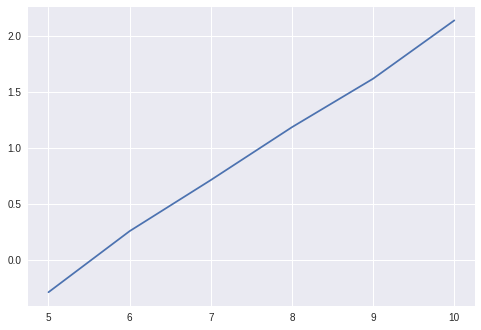

In [0]:
plt.plot(np.log2(N),-np.log2(Sigma))
plt.show()


In [0]:
out = ss.linregress(np.log2(N),-np.log2(Sigma))
print('----->>>the convergence order is ' + str(out[0]))

----->>>the convergence order is 0.4766560859830539
